In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [2]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils

print()

C:\Users\AragornDai\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
temp_dir = './temp/'
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
    os.makedirs(temp_dir)
    print('Clear the directory: {}\n'.format(temp_dir))
else:
    os.makedirs(temp_dir)
    print('Create the directory: {}\n'.format(temp_dir))

def savefig(fig, file_name):
    fig.savefig(temp_dir + file_name + '.png')
    print('Image file saved:', temp_dir + file_name + '.png')

Clear the directory: ./temp/



In [4]:
print('Loading data...')
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print('Done')
print("x_train_image.shape = {}".format(x_train_image.shape))
print("y_train_label.shape = {}".format(y_train_label.shape))
print(" x_test_image.shape = {}".format(x_test_image.shape))
print(" y_test_label.shape = {}\n".format(y_test_label.shape))

Loading data...
Done
x_train_image.shape = (60000, 28, 28)
y_train_label.shape = (60000,)
 x_test_image.shape = (10000, 28, 28)
 y_test_label.shape = (10000,)



Image file saved: ./temp/images_train_0_7.png



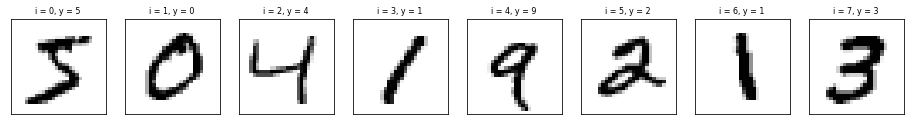

In [5]:
images_per_row = 8
defualt_row_number = 1
max_row_number = 3

def plot_images_labels_prediction(images, labels,
                                  prediction = [],
                                  start_index = 0,
                                  num = images_per_row * defualt_row_number):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(images_per_row * 2, images_per_row * 1.5)
    if num > images_per_row * max_row_number:
        raise ValueError("The maximum data number to print is " + str(images_per_row * max_row_number) + ".")
    for i in range(0, num):
        ax = plt.subplot(max_row_number, images_per_row, 1 + i)
        ax.imshow(images[start_index], cmap='binary')
        title = "i = " + str(start_index) + ", y = " + str(labels[start_index])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[start_index])
        ax.set_title(title, fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        start_index += 1
#   plt.show()
    if len(prediction) <= 0:
        savefig(fig, 'images_train_' + str(start_index - num) + '_' + str(start_index - 1))
    else:
        savefig(fig, 'images_test_' + str(start_index - num) + '_' + str(start_index - 1))

plot_images_labels_prediction(x_train_image, y_train_label)
print()

In [6]:
# normalize input image, 0 < input < 1
def normalize_input(input_image):
    return input_image.reshape(input_image.shape[0], 28, 28, 1).astype('float64') / 255

# normalize output label as one-hot encoding, for example, 4 will normalize as [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
def normalize_output(output_label):
    return np_utils.to_categorical(output_label)

# data preprocessing
x_train = normalize_input(x_train_image)
x_test  = normalize_input(x_test_image)
y_train = normalize_output(y_train_label)
y_test  = normalize_output(y_test_label)

In [7]:
# create convolutional neural network
model = Sequential()
# convolutional layer 1
model.add(
    Conv2D(
        filters = 16, # the number of output filters
        kernel_size = (5, 5), # the width and height of the 2D convolution window
        padding = 'same', # not changing data shape
        input_shape = (28, 28, 1),
        activation = 'relu'
    )
)
# pooling layer 1
model.add(
    MaxPooling2D(
        pool_size = (2, 2)
    )
)
# convolutional layer 2
model.add(
    Conv2D(filters = 36,
        kernel_size = (5, 5),
            padding = 'same',
            input_shape = (28, 28, 1),
            activation = 'relu'
    )
)
# pooling layer 2
model.add(
    MaxPooling2D(
        pool_size = (2, 2)
    )
)
# dropout layer
model.add(
    Dropout(
        rate = 0.5
    )
)
# flatten layer
model.add(
    Flatten()
)
# hidden layer 1
model.add(
    Dense(
        units = 100,
        activation = 'relu',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)
# hidden layer 2
model.add(
    Dense(
        units = 10,
        activation = 'softmax',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)
print(model.summary(), '\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               176500    
__________

In [8]:
# definite training method
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
# start training
train_history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 300,
    epochs = 20,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 41s 844us/step - loss: 0.5511 - acc: 0.8322 - val_loss: 0.1263 - val_acc: 0.9646
Epoch 2/20
48000/48000 [==============================] - 40s 841us/step - loss: 0.1303 - acc: 0.9590 - val_loss: 0.0784 - val_acc: 0.9762
Epoch 3/20
48000/48000 [==============================] - 41s 858us/step - loss: 0.0922 - acc: 0.9717 - val_loss: 0.0594 - val_acc: 0.9818
Epoch 4/20
48000/48000 [==============================] - 42s 874us/step - loss: 0.0766 - acc: 0.9765 - val_loss: 0.0525 - val_acc: 0.9850
Epoch 5/20
48000/48000 [==============================] - 42s 881us/step - loss: 0.0641 - acc: 0.9797 - val_loss: 0.0469 - val_acc: 0.9861
Epoch 6/20
48000/48000 [==============================] - 42s 878us/step - loss: 0.0554 - acc: 0.9831 - val_loss: 0.0412 - val_acc: 0.9882
Epoch 7/20
48000/48000 [==============================] - 42s 877us/step - loss: 0.0517 - acc: 0.9837 - val_loss: 0.

In [10]:
def show_train_history(train_history, train, validation):
    plt.clf()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
#   plt.show()
    savefig(plt, 'training_history_' + train)

Image file saved: ./temp/training_history_acc.png


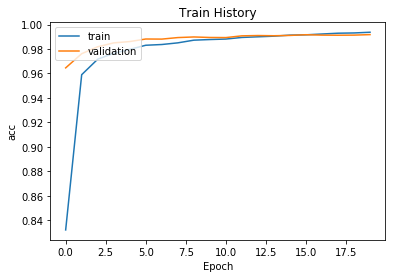

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

Image file saved: ./temp/training_history_loss.png



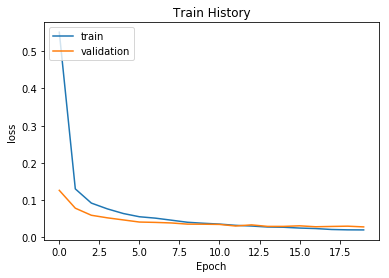

In [12]:
show_train_history(train_history, 'loss', 'val_loss')
print()

In [13]:
print('Evaluating: ')
scores = model.evaluate(x_test, y_test)
print("The loss of testing data:", scores[0])
print("The accuracy of testing data = {}%".format(scores[1] * 100.0))

Evaluating: 
10000/10000 [==============================] - 4s 355us/step
The loss of testing data: 0.02141828458572927
The accuracy of testing data = 99.3%


In [14]:
print('Predicting: ')
prediction = model.predict_classes(x_test, verbose = 1)
print(pd.crosstab(y_test_label, prediction, colnames=['predict'], rownames=['y']), '\n')

Predicting: 
10000/10000 [==============================] - 4s 352us/step
predict    0     1     2     3    4    5    6     7    8    9
y                                                            
0        978     0     0     1    0    0    1     0    0    0
1          0  1130     2     0    0    1    1     1    0    0
2          2     1  1027     0    0    0    0     1    1    0
3          0     0     1  1006    0    1    0     1    1    0
4          0     0     0     0  976    0    2     0    1    3
5          1     0     0     5    0  883    1     0    0    2
6          3     1     0     0    2    1  950     0    1    0
7          0     0     5     1    0    0    0  1020    1    1
8          2     0     2     1    0    1    0     1  963    4
9          0     0     0     1    5    2    0     2    2  997 



In [15]:
print('Data frame for error cases:')
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
error_list = df.loc[df.label != df.predict]
print(error_list, '\n')

Data frame for error cases:
      label  predict
247       4        6
340       5        3
445       6        0
448       9        8
582       8        2
659       2        1
684       7        2
947       8        9
1014      6        5
1112      4        6
1226      7        2
1232      9        4
1242      4        9
1247      9        5
1319      8        0
1393      5        3
1527      1        5
1878      8        3
1901      9        4
2035      5        3
2070      7        9
2098      2        0
2109      3        7
2118      6        0
2130      4        9
2414      9        4
2462      2        0
2597      5        3
2654      6        1
2896      8        0
...     ...      ...
3808      7        8
3985      9        4
4078      9        8
4176      2        7
4224      9        7
4238      7        3
4497      8        7
4507      1        2
4639      8        9
4740      3        5
4823      9        4
5937      5        3
5955      3        8
5981      5        9
5997  

The error case is at i = 244
Image file saved: ./temp/images_test_244_251.png



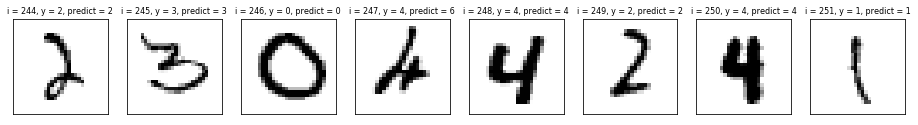

In [16]:
print("The error case is at i = {}".format(error_list.index[0] - 3))
plot_images_labels_prediction(x_test_image, y_test_label, prediction, start_index = max(0, error_list.index[0] - 3))
print()

In [17]:
print('Process ended.', '\n')

Process ended. 

